<h1><b>Google Colaboratory</b></h1>
<h5>Afif Rana Muhammad</h5>
<h5><b>Garuda Infinity</b>
<br>Rabu, 5 November 2020</h5>

> 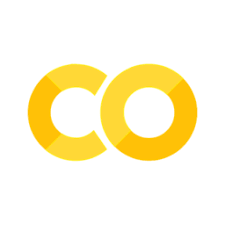





<h2><b>Cloud Computing</b></h2>

Cloud Computing -> Proses komputasi yang dilakukan melalui infrastruktur cloud.
Contoh :
1. Google Cloud Platform

> 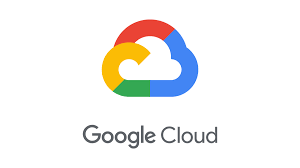

2. Amazon Web Service

> 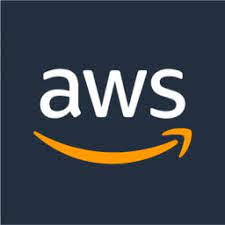

3. Microsoft Azure

> 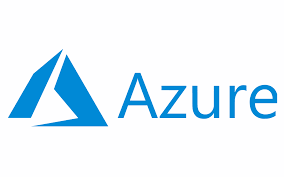


<h2><b>Jupyter Notebook Project</b></h2>

Media interaktif yang memungkinkan untuk menulis dokumentasi dan mengeksekusi kode Python dalam lembar kerja yang sama. Dokumentasi ini tidak hanya berupa tulisan, tetapi juga gambar maupun elemen HTML.

> 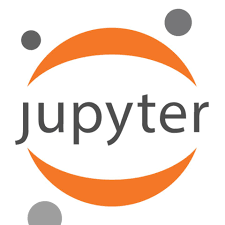


<h2><b>Apa itu Google Colaboratory?</b></h2>

Python Jupyter Notebook yang dikembangkan Google dan dirilis sekitar tahun 2017. Ada beberapa jenis Notebook lain yang juga terkendal. Seperti :
1. Amazon SageMaker

> 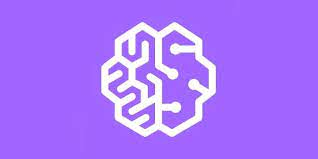

2. IBM Watson Studio

> 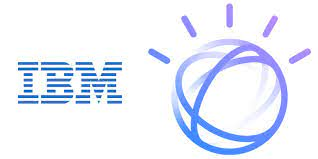

3. Azure Notebook

> 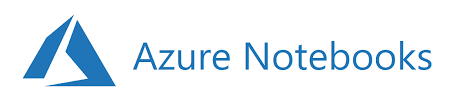

<h2><b>Ada apa saja di Google Colab?</b></h2>

Google menawarkan penggunaan cloud service-nya secara gratis untuk kebutuhan research dibidang Artificial Intelligence. Layanan ini termasuk meliputi kebutuhan GPU dan TPU untuk pengembangan model *Machine Learning* yang kompleks.

Google Colab diklaim lebih cepat dalam training dibanding dengan GPU-enabled laptop yang lain, sumber :
https://towardsdatascience.com/google-colab-how-does-it-compare-to-a-gpu-enabled-laptop-851c1e0a2ca9

> 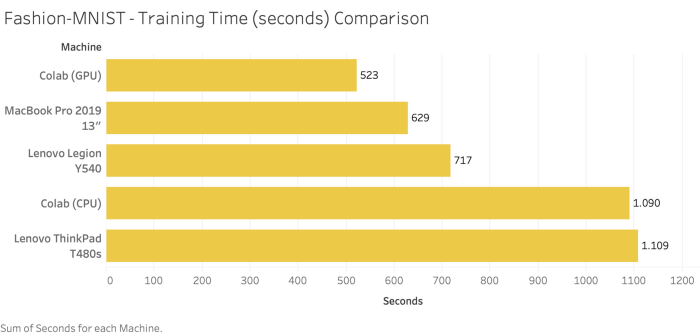

Lebih lanjut tentang Google Colab :

https://www.youtube.com/watch?v=inN8seMm7UI&list=PLQY2H8rRoyvyK5aEDAI3wUUqC_F0oEroL

<h2><b>Demo Python Google Colab</b></h2>

In [31]:
x = 6
y = "Hello World!"
print(x)
print(y)

6
Hello World!


In [32]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  print(x)

apple
banana
cherry


In [34]:
for x in range(2, 10):
  print(x)

2
3
4
5
6
7
8
9


In [2]:
array = ["cv","garuda", "infinity", "kreasindo"]
for x in array:
  print(x) 
  if x == "garuda":
    print("\nSelamat Datang\n")

cv
garuda

Selamat Datang

infinity
kreasindo


<h2><b>Demo - Studi Kasus Image Classification</b></h2>

In [3]:
!nvidia-smi

Wed Nov  4 01:56:01 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import numpy as np
import tensorflow as tf

print(tf.__version__)

2.3.0


In [5]:
from google.colab import drive
drive.mount('/content/drive')
# drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
# !wget --no-check-certificate \
#   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
#   -O /tmp/rockpaperscissors.zip

In [6]:
dataset = 'drive/My Drive/Dataset/rock-paper-scissors-dataset-2.zip'
# dataset = '/tmp/rockpaperscissors.zip'

In [7]:
import zipfile,os
zip_ref = zipfile.ZipFile(dataset, 'r')
zip_ref.extractall('/tmp/dataset')
zip_ref.close()

In [8]:
!pip install split_folders
# import split_folders
import splitfolders as sf
sf.ratio('/tmp/dataset/rock-paper-scissors-dataset-2/Rock-Paper-Scissors/dataset', output='/tmp/dataset/rock-paper-scissors-dataset-2/Rock-Paper-Scissors/data', seed=1337, ratio=(.7,.3))

Copying files: 2892 files [00:00, 4192.03 files/s]


In [9]:
root_path = '/tmp/dataset/rock-paper-scissors-dataset-2/Rock-Paper-Scissors/data'
# root_path = '/tmp/dataset/rockpaperscissors/data'
train_path = os.path.join(root_path, 'train')
validation_path = os.path.join(root_path, 'val')

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                  rescale = 1./225,
                  rotation_range = 30,
                  vertical_flip = True,
                  horizontal_flip = True,
                  zoom_range = 0.1,
                  width_shift_range = 0.1,
                    height_shift_range = 0.1,
                  shear_range = 0.2,
                  fill_mode = 'nearest')

In [11]:
test_datagen = ImageDataGenerator(
                  rescale = 1./225,
                  rotation_range = 30,
                  vertical_flip = True,
                  horizontal_flip = True,
                  zoom_range = 0.1,
                  width_shift_range = 0.1,
                    height_shift_range = 0.1,
                  shear_range = 0.2,
                  fill_mode = 'nearest')

In [12]:
train_generator = train_datagen.flow_from_directory(
                    train_path,
                    target_size = (150, 150),
                    batch_size = 32,
                    class_mode = 'categorical')

Found 2022 images belonging to 3 classes.


In [13]:
validation_generator = test_datagen.flow_from_directory(
                          validation_path,
                          target_size = (150, 150),
                          batch_size = 32,

                          class_mode = 'categorical')

Found 870 images belonging to 3 classes.


In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(512, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       2

In [16]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()

In [17]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.971):
      print("\nReached 97.1% accuracy so cancelling training!")
      self.model.stop_training = True

cb = myCallback()
mc = ModelCheckpoint('best_model.h5', 
                     monitor='val_loss',
                     save_best_only=True)

es = EarlyStopping(monitor='val_loss',
                   mode='max',
                   baseline=0.4)

In [19]:
model.fit(train_generator,
          steps_per_epoch=32,
          epochs=22,
          validation_data=validation_generator,
          validation_steps=13,
          verbose=2,
          callbacks=[mc, cb])

Epoch 1/22
32/32 - 11s - loss: 1.2538 - accuracy: 0.3387 - val_loss: 1.0980 - val_accuracy: 0.3269
Epoch 2/22
32/32 - 10s - loss: 1.1333 - accuracy: 0.3691 - val_loss: 1.0950 - val_accuracy: 0.3413
Epoch 3/22
32/32 - 10s - loss: 1.1091 - accuracy: 0.4058 - val_loss: 1.0662 - val_accuracy: 0.4543
Epoch 4/22
32/32 - 10s - loss: 1.0780 - accuracy: 0.4449 - val_loss: 0.9490 - val_accuracy: 0.4856
Epoch 5/22
32/32 - 10s - loss: 0.9935 - accuracy: 0.5661 - val_loss: 1.0184 - val_accuracy: 0.5144
Epoch 6/22
32/32 - 10s - loss: 0.8459 - accuracy: 0.6055 - val_loss: 0.8003 - val_accuracy: 0.6250
Epoch 7/22
32/32 - 10s - loss: 0.7437 - accuracy: 0.6914 - val_loss: 0.8064 - val_accuracy: 0.6154
Epoch 8/22
32/32 - 10s - loss: 0.5826 - accuracy: 0.7539 - val_loss: 0.3859 - val_accuracy: 0.8606
Epoch 9/22
32/32 - 10s - loss: 0.5948 - accuracy: 0.7568 - val_loss: 0.9755 - val_accuracy: 0.6707
Epoch 10/22
32/32 - 10s - loss: 0.5287 - accuracy: 0.8026 - val_loss: 0.3126 - val_accuracy: 0.9087
Epoch 11/

In [20]:
from keras.models import load_model
saved_model = load_model('best_model.h5')

Saving rock6.png to rock6.png
[[0. 1. 0.]]
[1]
rock6.png
rock


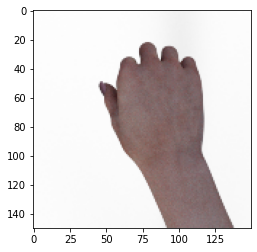

In [21]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=10)
  classes = np.argmax(predictions, axis = 1)
  print(predictions)
  print(classes)
  
  print(fn)
  if predictions[0][0]==1:
    print('paper')
  elif predictions[0][1]==1:
    print('rock')
  elif predictions[0][2]==1:
    print('scissors')
  else:
    print('Undefined')

  # print(fn)
  # if predictions[0][0]==1:
  #   print('rock')
  # elif predictions[0][1]==1:
  #   print('scissors')
  # elif predictions[0][2]==1:
  #   print('paper')
  # else:
  #   print('Undefined')

Saving paper1.png to paper1.png
[[1. 0. 0.]]
[0]
paper1.png
paper


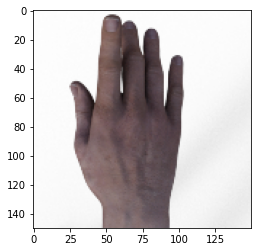

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=10)
  classes = np.argmax(predictions, axis = 1)
  print(predictions)
  print(classes)
  
  print(fn)
  if predictions[0][0]==1:
    print('paper')
  elif predictions[0][1]==1:
    print('rock')
  elif predictions[0][2]==1:
    print('scissors')
  else:
    print('Undefined')

Saving scissors9.png to scissors9.png
[[0. 0. 1.]]
[2]
scissors9.png
scissors


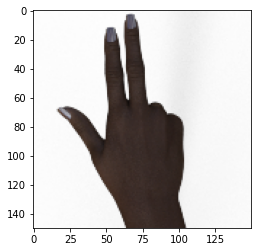

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=10)
  classes = np.argmax(predictions, axis = 1)
  print(predictions)
  print(classes)
  
  print(fn)
  if predictions[0][0]==1:
    print('paper')
  elif predictions[0][1]==1:
    print('rock')
  elif predictions[0][2]==1:
    print('scissors')
  else:
    print('Undefined')

Saving IMG_20201104_081454.jpg to IMG_20201104_081454.jpg
[[0. 0. 1.]]
[2]
IMG_20201104_081454.jpg
scissors


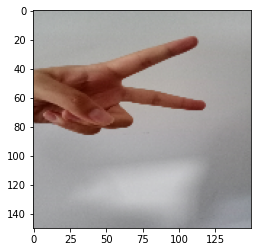

In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=10)
  classes = np.argmax(predictions, axis = 1)
  print(predictions)
  print(classes)
  
  print(fn)
  if predictions[0][0]==1:
    print('paper')
  elif predictions[0][1]==1:
    print('rock')
  elif predictions[0][2]==1:
    print('scissors')
  else:
    print('Undefined')

Saving IMG_20201104_081457.jpg to IMG_20201104_081457.jpg
[[0. 0. 1.]]
[2]
IMG_20201104_081457.jpg
scissors


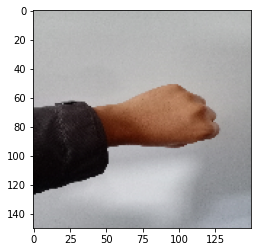

In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=10)
  classes = np.argmax(predictions, axis = 1)
  print(predictions)
  print(classes)
  
  print(fn)
  if predictions[0][0]==1:
    print('paper')
  elif predictions[0][1]==1:
    print('rock')
  elif predictions[0][2]==1:
    print('scissors')
  else:
    print('Undefined')

Saving IMG_20201104_081501.jpg to IMG_20201104_081501.jpg
[[0. 0. 1.]]
[2]
IMG_20201104_081501.jpg
scissors


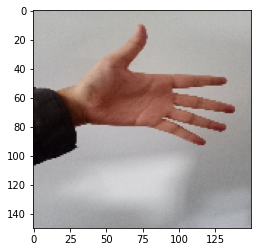

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=10)
  classes = np.argmax(predictions, axis = 1)
  print(predictions)
  print(classes)
  
  print(fn)
  if predictions[0][0]==1:
    print('paper')
  elif predictions[0][1]==1:
    print('rock')
  elif predictions[0][2]==1:
    print('scissors')
  else:
    print('Undefined')

# Terima Kasih